<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/QnX/Assignment_Pandas_QnX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Exploratory Data Analysis (EDA) on Real Estate Kuala Lumpur Malaysia <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is a crucial step in the data science process that involves analyzing and summarizing a dataset in order to better understand its characteristics and relationships.

In this project, we are going to perform EDA on dataset about Real Estate in Kuala Lumpur, Malaysia. The dataset can be found in Kaggle by clicking on this <a href="https://www.kaggle.com/datasets/thajegan76/real-estate-kuala-lumpur-malaysia">link</a>. There are a total of 7 columns with 7791 rows of data. 



1.   Title : Title is the name of the real estate properties
2.   Price : Price is the price of the properties with the currency unit of Ringgit Malaysia (RM)
3.   Area  : The location of the properties in Kuala Lumpur, Malaysia
4.   Category : The type of properties
5.   Size  : The size of the propeties counted in square feet (sq.ft.)
6.   Bedrooms : The number of bedrooms in a property
7.   Bathrooms : The number of bathrooms in a property

By using this dataset, we would like to analyze the characteristics and relationships of real estate in Kuala Lumpur, Malaysia. 

Throughout this project, the tools and techniques that will be used are Python libraries. We will be using **numpy** and **pandas** for data cleaning while **matplotlib.pyplot** and **seaborn** for data visualisation. 

This project is done by **Team QnX**:


1.   Lee Ming Qi (A20EC0064)
2.   Lee Jia Xian (A20EC0200)



## Downloading the Dataset

**TODO** - import the data directly from Kaggle to Google Colab


1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:


In [1]:
#!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

# Choose the kaggle.json file that you downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leemingqi","key":"31677066beb23f6e38d3bbf1faeeacd8"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

# Make directory named kaggle and copy kaggle.json file there.

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

# Change the permissions of the file.

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
!kaggle datasets download -d thajegan76/real-estate-kuala-lumpur-malaysia

  0% 0.00/177k [00:00<?, ?B/s]
100% 177k/177k [00:00<00:00, 35.9MB/s]


In [6]:
!kaggle datasets files thajegan76/real-estate-kuala-lumpur-malaysia

name                size  creationDate         
-----------------  -----  -------------------  
kl_properties.csv  950KB  2021-10-09 04:33:10  


In [7]:
#Unzip the data remove zip
!unzip real-estate-kuala-lumpur-malaysia.zip && rm real-estate-kuala-lumpur-malaysia.zip

Archive:  real-estate-kuala-lumpur-malaysia.zip
  inflating: kl_properties.csv       


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

**TODO** - Write some explanation here.




> - Import the required Python libraries
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


> Import the required Python dependencies




In [8]:
import numpy as np
import pandas as pd

> Load the dataset into a data frame using *Pandas*





In [45]:
df = pd.read_csv("kl_properties.csv")

> View the first 5 rows of the dataframe

In [10]:
df.head(5)

,Title,Price,Area,Category,Size,Bedrooms,Bathrooms
0,"M City Serviced Residence Jalan Ampang 886sf, ...",RM 690 000,AMPANG,Apartments,886 sq.ft.,2 Bedrooms,2 Bathrooms
1,Cheapest fully furnished suria jelatek residen...,RM 420 000,AMPANG,Apartments,858 sq.ft.,3 Bedrooms,2 Bathrooms
2,3bed 2bath Suria Jelatek Condo 5 min to LRT an...,RM 420 000,AMPANG,Apartments,860 sq.ft.,3 Bedrooms,2 Bathrooms
3,"[30% Below,1037sf] Direct Subsale not Auction!...",RM 568 444,AMPANG,Apartments,1037 sq.ft.,3 Bedrooms,2 Bathrooms
4,HOT area | Tiara Ampang | Near Ampang Point | ...,RM 618 000,AMPANG,Apartments,1650 sq.ft.,4 Bedrooms,2 Bathrooms


> Explore the number of rows & columns, ranges of values etc.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      7791 non-null   object
 1   Price      7791 non-null   object
 2   Area       7791 non-null   object
 3   Category   7791 non-null   object
 4   Size       7791 non-null   object
 5   Bedrooms   7791 non-null   object
 6   Bathrooms  7791 non-null   object
dtypes: object(7)
memory usage: 426.2+ KB


In [12]:
df.describe()

,Title,Price,Area,Category,Size,Bedrooms,Bathrooms
count,7791,7791,7791,7791,7791,7791,7791
unique,7504,849,14,1,914,10,8
top,"Pangsapuri Mutiara Magna, Metro Prima, Kepong",RM 300 000,CHERAS,Apartments,650 sq.ft.,3 Bedrooms,2 Bathrooms
freq,5,257,2705,7791,524,5765,6169


> Handle missing, incorrect and invalid data

In [13]:
# check if there is any null value in each column
df.isnull().sum()

Title        0
Price        0
Area         0
Category     0
Size         0
Bedrooms     0
Bathrooms    0
dtype: int64



> As shown above, there is no null value in our table. Hence, we are not required to remove any rows which contain the Null value. Next, we will be dropping the duplicate rows



In [14]:
df.shape[0]

7791

> The original dataframe has 7791 rows




In [15]:
df[df.duplicated()].shape[0]

77

> From the output above, we can notice that there are 77 duplicated rows

In [46]:
#removing duplicated rows
df = df.drop_duplicates()

In [17]:
df.shape[0]

7714



> The number of rows after dropping duplicated rows is 7714.



In [18]:
#print the number of unique value in each column
for col in df:
  print(col, ' : ', df[col].nunique())

Title  :  7504
Price  :  849
Area  :  14
Category  :  1
Size  :  914
Bedrooms  :  10
Bathrooms  :  8


We can notice that the category column only has one unique value. So, we will drop the column in our next code.

In [47]:
df.drop('Category', axis=1, inplace=True)

In [20]:
df.shape[1]

6

After dropping the column, We have 6 columns left.


**Data Parsing for each columns**

Since some of data are useful for numerical analysis, we convert them into integer data type.

In [48]:
df['Price'].replace('RM', '', regex=True, inplace=True) #remove the currency unit 
df['Price'].replace(' ', '', regex=True, inplace=True)  #remove blank space
df['Price'] = df['Price'].astype(str).astype(int)       #convert the datatypes to integer
df = df.rename(columns={'Price' : 'Price(RM)'})         #rename the column 


In [49]:
df['Size'].replace('sq.ft.', '', regex=True, inplace=True) #remove the size unit 
df['Size'].replace(' ', '', regex=True, inplace=True)      #remove blank space
df['Size'] = df['Size'].astype(str).astype(int)            #convert the datatypes to integer
df = df.rename(columns={'Size' : 'Size(sq.ft.)'})          #rename the column 


In [50]:
df['Bedrooms'].unique()

array(['2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '1 Bedroom',
       '5 Bedrooms', '8 Bedrooms', '6 Bedrooms', '9 Bedrooms',
       'More than 10 Bedroom', '7 Bedrooms'], dtype=object)

In [51]:
df['Bedrooms'].replace('Bedrooms', '', regex=True, inplace=True) #remove the unit 
df['Bedrooms'].replace('Bedroom', '', regex=True, inplace=True)  #remove the unit 
df['Bedrooms'].replace('More than', '', regex=True, inplace=True)#remove the unnecessary wording 
df['Bedrooms'].replace(' ', '', regex=True, inplace=True)        #remove blank space
df['Bedrooms'] = df['Bedrooms'].astype(str).astype(int)          #convert the datatypes to string

In [52]:
df['Bathrooms'].unique()

array(['2 Bathrooms', '1 Bathroom', '4 Bathrooms', '3 Bathrooms',
       '5 Bathrooms', '6 Bathrooms', '10 Bathrooms', '7 Bathrooms'],
      dtype=object)

In [53]:
df['Bathrooms'].replace('Bathrooms', '', regex=True, inplace=True) #remove the unit 
df['Bathrooms'].replace('Bathroom', '', regex=True, inplace=True)  #remove the unit 
df['Bathrooms'].replace(' ', '', regex=True, inplace=True)         #remove blank space
df['Bathrooms'] = df['Bathrooms'].astype(str).astype(int)          #convert the datatypes to string

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7714 entries, 0 to 7790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7714 non-null   object
 1   Price(RM)     7714 non-null   int64 
 2   Area          7714 non-null   object
 3   Size(sq.ft.)  7714 non-null   int64 
 4   Bedrooms      7714 non-null   int64 
 5   Bathrooms     7714 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 421.9+ KB


**Removing outlier**

Outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Removing outliers can avoid the statical analysis to be heavily affected by the outliers.

In [58]:
for col in df[['Price(RM)', 'Size(sq.ft.)']]:
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)

  df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [62]:
df.shape[0]

7394

After removing outliers in the column 'Price' and 'Size', we have 7394 rows of data left.

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [185]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Descriptive Statistics**

In [106]:
df.describe()

,Price(RM),Size(sq.ft.),Bedrooms,Bathrooms
count,7.394000e+03,7394.000000,7394.000000,7394.000000
mean,4.011108e+05,979.248309,2.957939,2.015418
std,1.738104e+05,261.761546,0.595070,0.516499
min,1.260000e+05,350.000000,1.000000,1.000000
25%,2.900000e+05,818.000000,3.000000,2.000000
50%,3.750000e+05,950.000000,3.000000,2.000000
75%,4.800000e+05,1119.000000,3.000000,2.000000
max,1.280000e+06,1945.000000,9.000000,5.000000




> From table above, we get to know the count, mean, standard deviation, minimum value, 1st quatile, median, 3rd quatile and maximum value for the numeric columns (Price, Size, Bedrooms, Bathrooms)




**Pie Chart**

To present categorical data, we used pie chart to show the distribution of area of real estate.

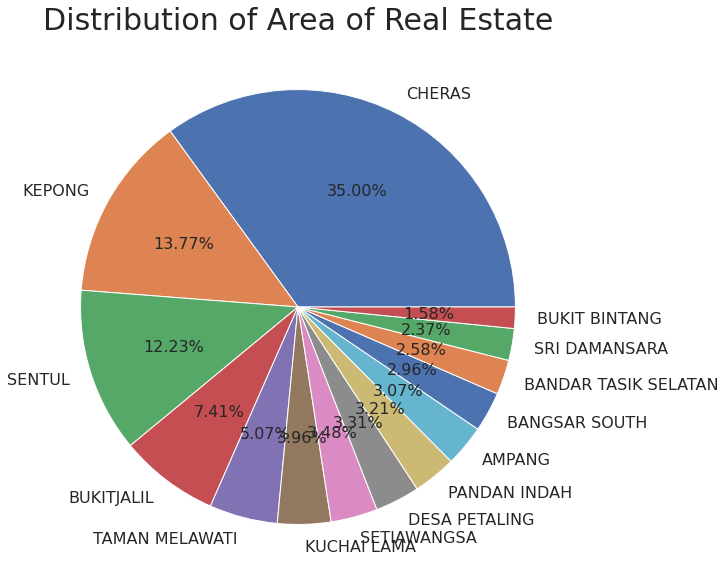

In [108]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.pie(x = df.Area.value_counts().values, labels = df.Area.value_counts().index, autopct='%.2f%%', textprops={'fontsize': 16})
plt.title('Distribution of Area of Real Estate', size = 30);
plt.show()



> From the pie chart above, we can suggest that Cheras has the highest distrubtion of real estate in Kuala Lumpur while Bukit Bintang has the lowest distribution.



**Histogram**



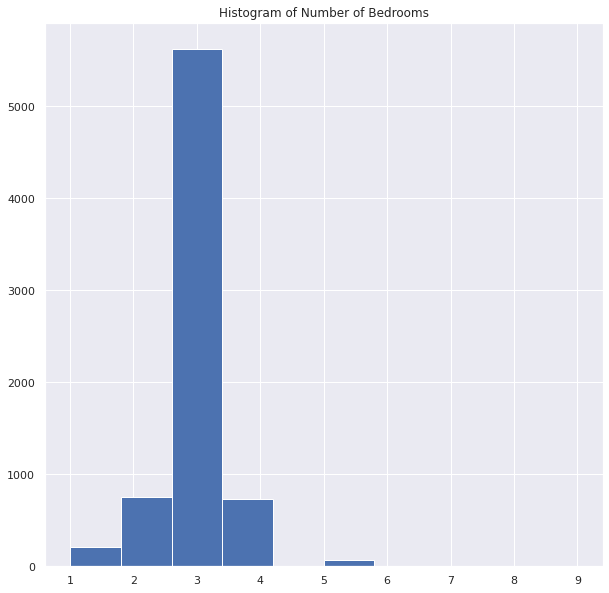

In [157]:
plt.title("Histogram of Number of Bedrooms")
df.Bedrooms.hist()

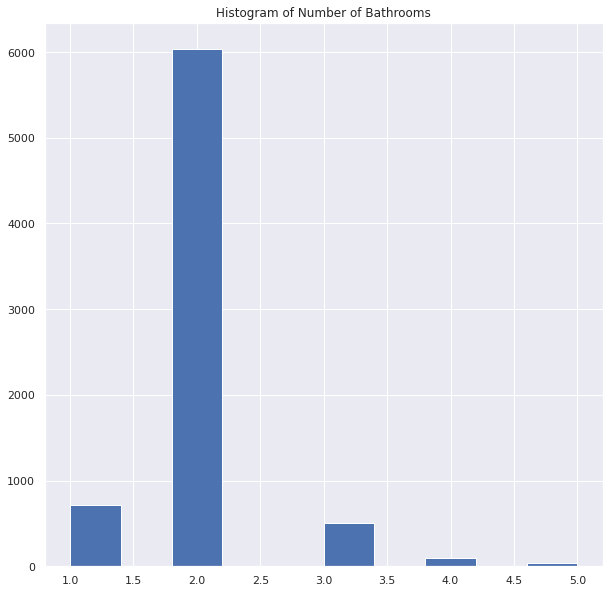

In [156]:
plt.title("Histogram of Number of Bathrooms")
df.Bathrooms.hist()

**Heatmap**

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. For this dataset, we used heatmap to display the correlation between each numeric columns.

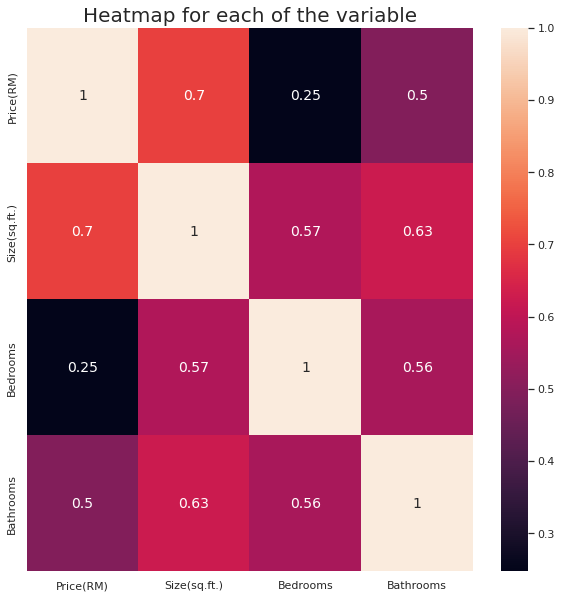

In [112]:
# df_pivot = df.groupby(['Bedrooms', 'Bathrooms', 'Price(RM)'])
c = df.corr()
sns.heatmap(c, annot=True)
plt.title('Heatmap for each of the variable', size = 20);
plt.show()

From the heatmap, we can noticed that the variable "Size" and "Price" has the highest correlation while "Bedroom" and "Price" has the lowest correlation.

**Scatter Plot**

A scatter plot is a graphical representation of data that uses dots or markers to represent individual data points. Scatter plots are used to visualize the relationship between two continuous variables. In this case, we will be analyzing the relationship between two numeric columns in the dataset

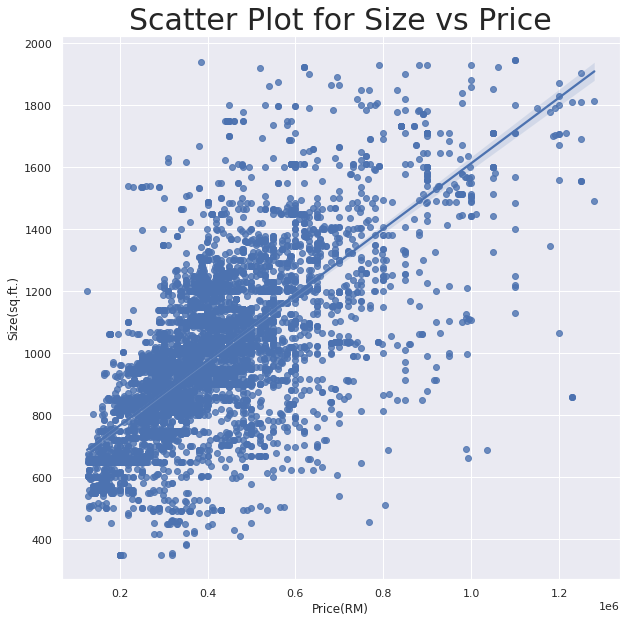

In [134]:
sns.regplot(data = df, y = 'Size(sq.ft.)', x = 'Price(RM)')
plt.title('Scatter Plot for Size vs Price', size = 30);


Based on the scatter plot above, we can suggest that most of real estates have smaller size and lower price. The regression line shows there is a positive relationship between the size and price. Hence, the size will affect the price of the real estate. The smaller the size, the lower the price!

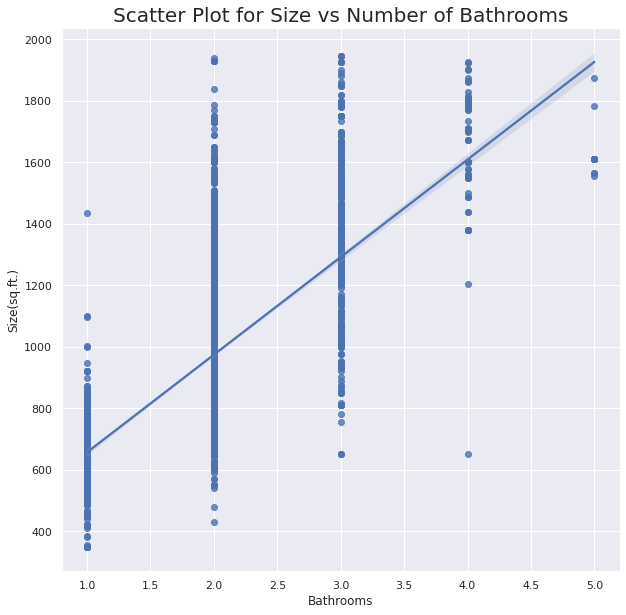

In [139]:
sns.regplot(data = df, y = 'Size(sq.ft.)', x = 'Bathrooms')
plt.title('Scatter Plot for Size vs Number of Bathrooms', size = 20);


The regression line shows there is a positive relationship between the size and number of bathroom. Hence, the size will affect the number of bathrooms in the real estate. The bigger the size, the more the number of bathrooms!

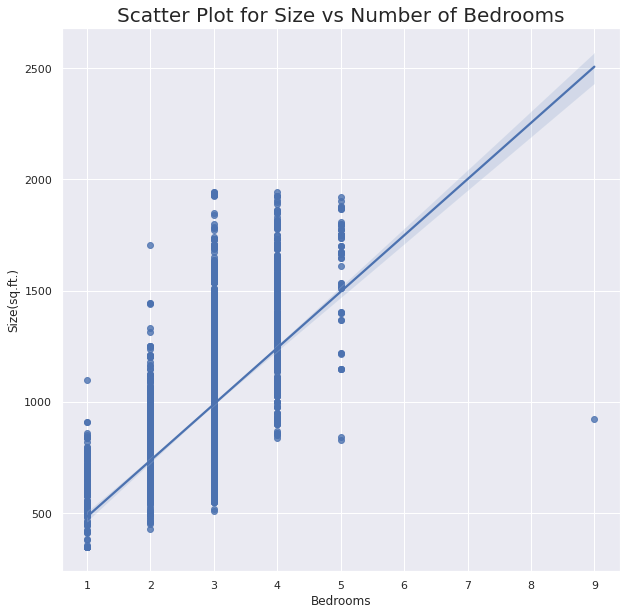

In [142]:
sns.regplot(data = df, y = 'Size(sq.ft.)', x = 'Bedrooms')
plt.title('Scatter Plot for Size vs Number of Bedrooms', size = 20);


The regression line shows there is a positive relationship between the size and number of bedrooms. Hence, the size will affect the number of bedrooms in the real estate. The bigger the size, the more the number of bedrooms!

**Bar Chart**

A bar chart is a graphical representation of data that uses bars of different heights or lengths to compare values across categories. For the bar chart Area vs Price, we will be taking the median of price in each area and compare among the area.

Text(0.5, 0, 'Price (RM)')

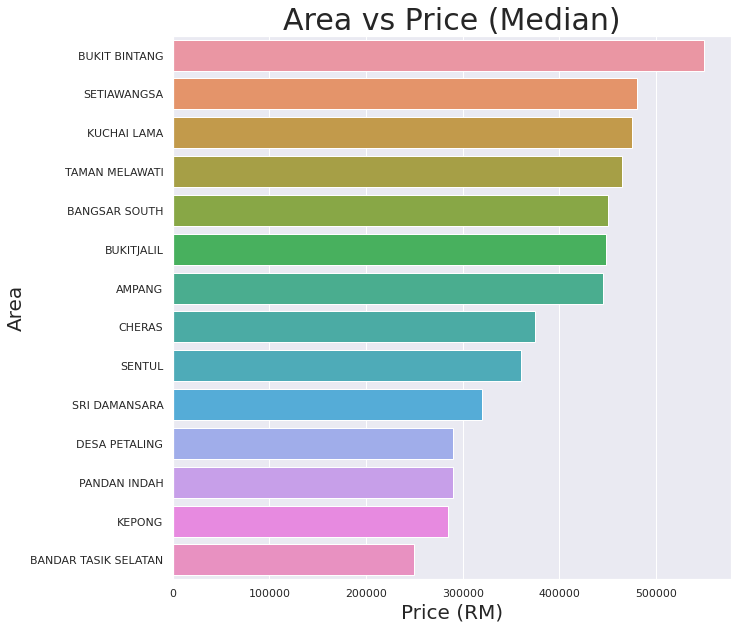

In [207]:
group=df.groupby("Area")['Price(RM)'].median().sort_values(ascending=False).reset_index()

sns.barplot(data=group, y='Area', x='Price(RM)', orient='h')
plt.title('Area vs Price (Median)', size = 30);
plt.ylabel("Area", size = 20)
plt.xlabel("Price (RM)", size = 20)

From the bar chart above, we can suggest that Bukit Bintang has the highest price in Kuala Lumpur while Bandar Tasik Selatan has the lowest price.

Text(0.5, 0, 'Size (sq.ft.)')

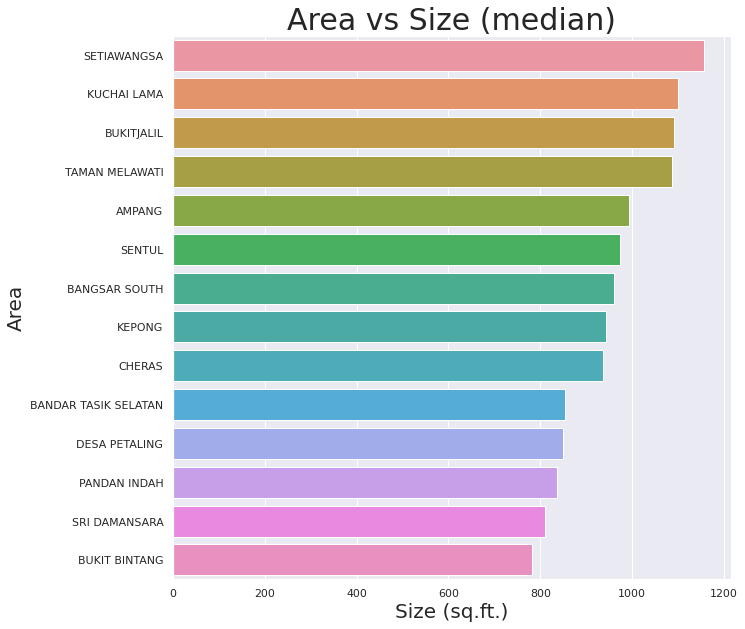

In [211]:
group=df.groupby("Area")['Size(sq.ft.)'].median().sort_values(ascending=False).reset_index()

sns.barplot(data=group, y='Area', x='Size(sq.ft.)', orient='h')
plt.title('Area vs Size (median)', size = 30);
plt.ylabel("Area", size = 20)
plt.xlabel("Size (sq.ft.)", size = 20)

From the bar chart above, we can suggest that Setiawangsa has the largest size of real estate in Kuala Lumpur while Bukit Bintang has the smallest price.



## Asking and Answering Questions

5 questions will be asked in this section and we will try answer the questions using the dataset and python libraries.


#### Q1. What are the Top 3 Area with most and least real estate?

We use value_counts() to get the count of each area. Then we use slicing technique to get the top 3 [:3] and last 3 [:-4:-1].

In [178]:
print("Top 3 most real estate area")
df.Area.value_counts()[:3]

Top 3 most real estate area


CHERAS    2588
KEPONG    1018
SENTUL     904
Name: Area, dtype: int64

In [231]:
print("Top 3 least real estate area")
df.Area.value_counts()[:-4:-1]

Top 3 least real estate area


BUKIT BINTANG           117
SRI DAMANSARA           175
BANDAR TASIK SELATAN    191
Name: Area, dtype: int64

**Answer:** 

The top 3 most real estate area are Cheras, Kepong and Sentul while the top 3 least real estate are Bandar Tasik Selatan, Sri Damansara, and Bukit Bintang.

#### Q2. What is the highest average size of real estate in each area?

We use groupby function to group the data based on Area and we calculate the average size of each area using mean(). We also use sort_value(ascending=False) to let us view the highest average size first.

In [209]:
group=df.groupby("Area")['Size(sq.ft.)'].mean().sort_values(ascending=False).reset_index()
group


,Area,Size(sq.ft.)
0,KUCHAI LAMA,1154.129693
1,SETIAWANGSA,1139.147860
2,BUKITJALIL,1090.580292
3,TAMAN MELAWATI,1088.762667
4,AMPANG,1032.167401
5,SENTUL,980.566372
6,CHERAS,969.538640
7,BANGSAR SOUTH,955.324201
8,KEPONG,913.325147
9,SRI DAMANSARA,902.222857


**Answer:** 

The highest average size of real estate in each area are as following:

KUCHAI LAMA	(1154.12 sq.ft.)

SETIAWANGSA	(1139.147860 sq.ft.)

BUKITJALIL	(1090.580292 sq.ft.)


We can visualise the result in a bar plot as shown below.

Text(0.5, 0, 'Size (Rsq.ft.)')

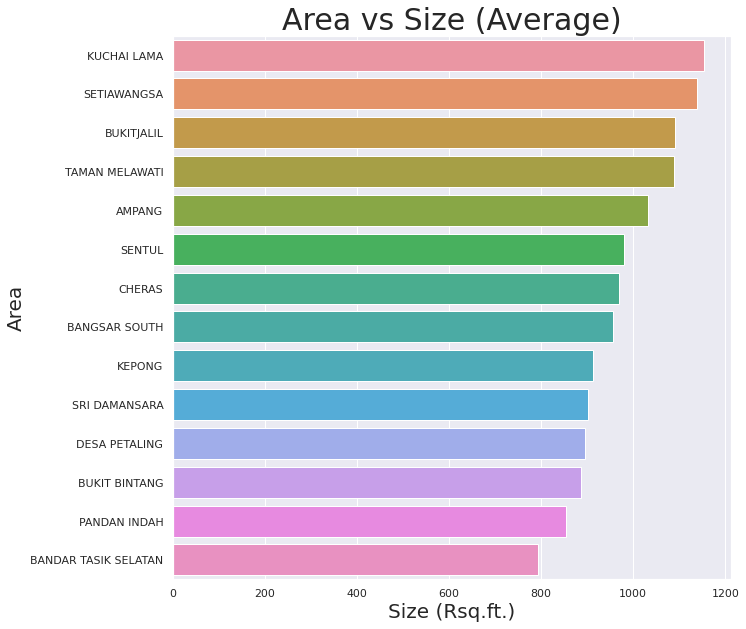

In [210]:
sns.barplot(data=group, y='Area', x='Size(sq.ft.)', orient='h')
plt.title('Area vs Size (Average)', size = 30);
plt.ylabel("Area", size = 20)
plt.xlabel("Size (Rsq.ft.)", size = 20)

#### Q3: Which is the most popular combo of number of bathrooms and bedrooms in real estate?

We used value_counts() again to get the count, but this time we included 2 columns in our counting, which is 'Bathrooms' and 'Bedrooms' 

In [204]:
df[["Bathrooms","Bedrooms"]].value_counts()

Bathrooms  Bedrooms
2          3           5162
           2            448
           4            390
1          2            288
           3            236
3          4            232
           3            215
1          1            185
4          4             72
5          4             38
3          5             35
2          1             26
3          2             22
4          5             15
2          5             13
4          3             13
5          5              2
1          4              1
2          9              1
dtype: int64

**Answer:** 

Based on the table above, 2 bathrooms and 3 bedrooms are the most popular combo in real estate, followed by 2 bathrooms and 2 bedrooms. 

#### Q4: Which of the area are particularly high or low prices compared to the average price of real estate?

We use groupby function to group the data based on Area and we calculate the average price of each area using mean(). We also use sort_value(ascending=False) to let us view the highest average price first. Then, we compare the price of each area with the average price of all area by using '>' and '<'.

In [227]:
group=df.groupby("Area")['Price(RM)'].mean().sort_values(ascending=False).reset_index()
high_avg_area = group[group['Price(RM)'] > df['Price(RM)'].mean()]
high_avg_area['Area']

0     BUKIT BINTANG
1    TAMAN MELAWATI
2       KUCHAI LAMA
3       SETIAWANGSA
4     BANGSAR SOUTH
5        BUKITJALIL
6            AMPANG
Name: Area, dtype: object

In [226]:
low_avg_area = group[group['Price(RM)'] < df['Price(RM)'].mean()]
low_avg_area.Area

7                   SENTUL
8                   CHERAS
9            SRI DAMANSARA
10                  KEPONG
11           DESA PETALING
12            PANDAN INDAH
13    BANDAR TASIK SELATAN
Name: Area, dtype: object

**Answer:** 

The area with price above average are Bukit Bintang, Kuchai Lama, Setiawangsa, Bangsar South, Bukitjalil, and Ampang.

The area with price below average are Sentul, Cheras, Sri Damansara, Kepong, Desa Petaling, Pandan Indah, and Bandar Tasik Selatan.

#### Q5: Which location has the cheapest of price compare with the size of the real estate?

We divide price with size to get price per size column in our dataset. We use groupby function to group the data based on Area and we calculate the average price per size of each area using mean(). We also use sort_value(ascending=True) to let us view the highest average price per size first. By viewing the price per size, we can know that which area has the most valuable real estate.

In [232]:
df['pricepersize'] = df['Price(RM)'] / df['Size(sq.ft.)']

Text(0.5, 0, 'Price per Size (RM/sq.ft.)')

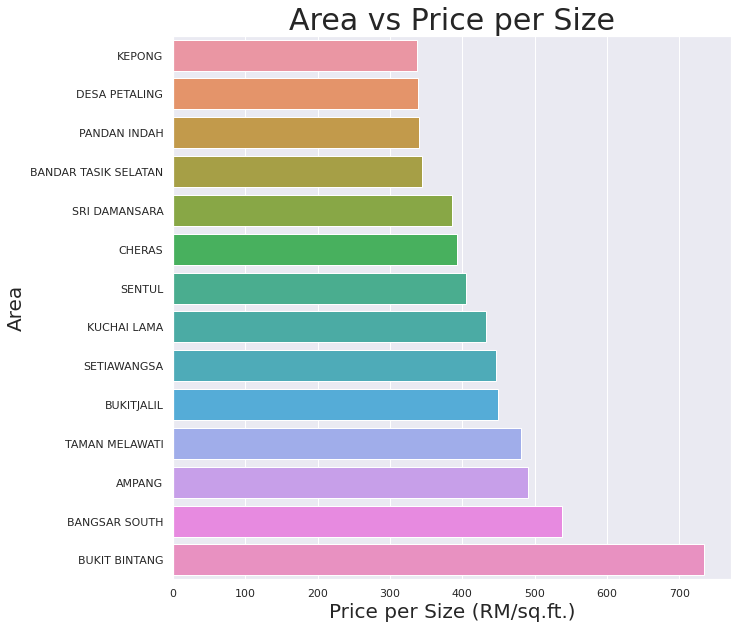

In [233]:
group=df.groupby("Area")['pricepersize'].mean().sort_values(ascending=True).reset_index()

fig = sns.barplot(data=group, x="pricepersize", y="Area")
plt.title('Area vs Price per Size', size = 30);
plt.ylabel("Area", size = 20)
plt.xlabel("Price per Size (RM/sq.ft.)", size = 20)

**Answer:** 

Kepong has the cheapest worth of price compare with the size of the real estate.

## Inferences and Conclusion

To summarize, we have followed a process of obtaining and analyzing the dataset to answer several interesting questions about the data. Through this process, we have gained insight into the characteristics and patterns contained within the dataset. In conclusion, the top 3 most real estate area are Cheras, Kepong and Sentul while Kuchai Lama, Setiawangsa and Bukitjalil has the largest average size of real estate. As for bathrooms and bedrooms, 2 bathrooms and 3 bedrooms are the most popular combo in real estate, followed by 2 bathrooms and 2 bedrooms. Almost half of the area in KL has above average prices, which includes Bukit Bintang, Kuchai Lama, Setiawangsa, Bangsar South, Bukitjalil, and Ampang. Lastly, Kepong has the cheapest worth of price compare with the size of the real estate.
  

Based on the analysis, we can give a few suggestions for the buyers as well as the contractor. First, we would recommend the buyers who wanted an affordable real estate to buy at Kepong. For those who want to live in a big house, there are many options at Kuchai Lama, Setiawangsa and Bukitjalil. If you don't want to get angry of the high prices, avoid Bukit Bintang, Kuchai Lama, Setiawangsa, Bangsar South, Bukitjalil, and Ampang. As for contractors, you can focus on building real estate with 2 bathrooms and 3 bedrooms as it will has the highest demand. 




## References and Future Work

We might use this dataset to discover the on demand real estate in the future.

**Reference**

https://www.kaggle.com/code/thajegan76/properties-kuala-lumpur-malaysia/data
